In [ ]:

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = "/content/drive/MyDrive/Data /FinalMerge.csv"
data = pd.read_csv(path1)

In [ ]:
data

,Unnamed: 0,CellLine,Drug_ID,IC50,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,216.1,217.1,218.1,219.1,220.1,221.1,222.1,223.1,224.1,225.1,226.1,227.1,228.1,229.1,230.1,231.1,232.1,233.1,234.1,235.1,236.1,237.1,238.1,239.1,240.1,241.1,242.1,243.1,244.1,245.1,246.1,247.1,248.1,249.1,250.1,251.1,252.1,253.1,254.1,255.1
0,0,ACH-000001,BRD-A00077618-236-07-6,-0.015577,-1.728556,2.433999,-1.019930,-1.757898,0.581074,-1.755267,4.228473,11.930831,1.277193,6.407866,10.054983,3.686244,-1.478580,-1.756955,5.688684,5.094495,5.159706,13.130322,-1.753273,6.061655,-1.458180,-0.655714,-0.800840,4.223152,3.307067,-1.758053,-1.734444,1.684067,1.012239,-1.723961,2.282735,-1.688657,1.826957,4.558780,-1.754363,-1.756690,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,1,ACH-000007,BRD-A00077618-236-07-6,-0.095730,-1.616083,-0.771061,0.756457,-1.753133,1.491488,-1.756090,3.300556,19.351883,-1.369320,1.282292,2.253259,3.900788,-1.636076,-1.758013,-1.414857,6.376349,6.380097,12.358499,-1.740736,5.522613,1.900356,-1.321983,-1.008918,8.447057,7.572113,-1.757873,-1.703370,5.175867,6.213225,-1.683146,3.545616,-1.752450,3.046654,5.377875,-1.726717,-1.743359,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,2,ACH-000008,BRD-A00077618-236-07-6,0.379480,-1.230021,5.240048,1.379720,-1.757688,1.186564,-1.757788,6.258858,9.067563,-0.680781,4.748775,9.537188,9.402541,-0.968205,-1.754238,9.814918,6.873575,8.750247,18.125177,-1.757897,4.825569,-0.825798,0.169827,4.689946,0.951656,1.068404,-1.758077,-1.736978,3.728566,8.849792,-1.756784,0.143789,-1.704643,2.109847,4.786537,-1.746333,-1.757513,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,3,ACH-000010,BRD-A00077618-236-07-6,0.118890,-1.713630,4.790173,-0.075236,-1.757076,-0.659162,-1.756251,5.472468,13.853428,1.338245,8.216239,9.874049,5.183456,-1.560059,-1.752247,8.714049,7.576016,7.060184,13.696853,-1.756716,8.130669,-1.564248,-0.827464,3.788671,0.889381,0.356038,-1.758017,-1.707353,1.883788,3.547088,-1.741584,2.407140,-1.745215,-0.464359,7.394870,-1.747943,-1.753574,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
4,4,ACH-000011,BRD-A00077618-236-07-6,0.145346,-1.720528,1.592634,1.981018,-1.757607,0.630482,-1.753977,4.662811,12.751846,1.074993,5.462288,6.408267,6.239316,-1.548074,-1.755546,5.446209,6.882668,6.231433,15.046421,-1.757021,6.341629,1.087580,-0.344353,-0.536584,4.180730,1.469086,-1.758014,-1.686345,2.930312,3.779099,-1.738527,4.007609,-1.743249,0.342900,5.377270,-1.750576,-1.756797,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19834,19834,ACH-001239,BRD-A04322457-003-17-9,0.369926,-1.389295,6.018878,2.696053,-1.757883,0.879858,-1.757979,6.266390,8.563468,-1.328204,5.375595,9.389275,8.908756,-0.825840,-1.749972,10.664358,7.641659,9.567306,16.609623,-1.757955,6.229425,-0.871218,-0.219832,6.038338,2.092164,0.528440,-1.758079,-1.727836,4.124252,7.758388,-1.756457,-1.023202,-1.681456,2.456260,5.961589,-1.753670,-1.756886,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19835,19835,ACH-001306,BRD-A04322457-003-17-9,-0.039914,-1.721469,6.470818,0.637218,-1.757760,0.096986,-1.756002,4.812477,9.989901,3.417594,6.272072,10.238437,8.883233,-1.154211,-1.753805,7.669941,8.147975,8.462427,17.399153,-1.757613,4.024602,-0.487762,2.858115,1.388427,1.917493,1.516732,-1.758068,-1.754246,1.485408,5.743079,-1.753075,0.384726,-1.744678,2.402699,5.569891,-1.724864,-1.757925,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [ ]:
d=data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
d

,CellLine,Drug_ID,IC50,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,216.1,217.1,218.1,219.1,220.1,221.1,222.1,223.1,224.1,225.1,226.1,227.1,228.1,229.1,230.1,231.1,232.1,233.1,234.1,235.1,236.1,237.1,238.1,239.1,240.1,241.1,242.1,243.1,244.1,245.1,246.1,247.1,248.1,249.1,250.1,251.1,252.1,253.1,254.1,255.1
0,ACH-000001,BRD-A00077618-236-07-6,-0.015577,-1.728556,2.433999,-1.019930,-1.757898,0.581074,-1.755267,4.228473,11.930831,1.277193,6.407866,10.054983,3.686244,-1.478580,-1.756955,5.688684,5.094495,5.159706,13.130322,-1.753273,6.061655,-1.458180,-0.655714,-0.800840,4.223152,3.307067,-1.758053,-1.734444,1.684067,1.012239,-1.723961,2.282735,-1.688657,1.826957,4.558780,-1.754363,-1.756690,-1.753150,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,ACH-000007,BRD-A00077618-236-07-6,-0.095730,-1.616083,-0.771061,0.756457,-1.753133,1.491488,-1.756090,3.300556,19.351883,-1.369320,1.282292,2.253259,3.900788,-1.636076,-1.758013,-1.414857,6.376349,6.380097,12.358499,-1.740736,5.522613,1.900356,-1.321983,-1.008918,8.447057,7.572113,-1.757873,-1.703370,5.175867,6.213225,-1.683146,3.545616,-1.752450,3.046654,5.377875,-1.726717,-1.743359,-1.749476,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,ACH-000008,BRD-A00077618-236-07-6,0.379480,-1.230021,5.240048,1.379720,-1.757688,1.186564,-1.757788,6.258858,9.067563,-0.680781,4.748775,9.537188,9.402541,-0.968205,-1.754238,9.814918,6.873575,8.750247,18.125177,-1.757897,4.825569,-0.825798,0.169827,4.689946,0.951656,1.068404,-1.758077,-1.736978,3.728566,8.849792,-1.756784,0.143789,-1.704643,2.109847,4.786537,-1.746333,-1.757513,-1.743727,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,ACH-000010,BRD-A00077618-236-07-6,0.118890,-1.713630,4.790173,-0.075236,-1.757076,-0.659162,-1.756251,5.472468,13.853428,1.338245,8.216239,9.874049,5.183456,-1.560059,-1.752247,8.714049,7.576016,7.060184,13.696853,-1.756716,8.130669,-1.564248,-0.827464,3.788671,0.889381,0.356038,-1.758017,-1.707353,1.883788,3.547088,-1.741584,2.407140,-1.745215,-0.464359,7.394870,-1.747943,-1.753574,-1.728868,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
4,ACH-000011,BRD-A00077618-236-07-6,0.145346,-1.720528,1.592634,1.981018,-1.757607,0.630482,-1.753977,4.662811,12.751846,1.074993,5.462288,6.408267,6.239316,-1.548074,-1.755546,5.446209,6.882668,6.231433,15.046421,-1.757021,6.341629,1.087580,-0.344353,-0.536584,4.180730,1.469086,-1.758014,-1.686345,2.930312,3.779099,-1.738527,4.007609,-1.743249,0.342900,5.377270,-1.750576,-1.756797,-1.753634,...,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19834,ACH-001239,BRD-A04322457-003-17-9,0.369926,-1.389295,6.018878,2.696053,-1.757883,0.879858,-1.757979,6.266390,8.563468,-1.328204,5.375595,9.389275,8.908756,-0.825840,-1.749972,10.664358,7.641659,9.567306,16.609623,-1.757955,6.229425,-0.871218,-0.219832,6.038338,2.092164,0.528440,-1.758079,-1.727836,4.124252,7.758388,-1.756457,-1.023202,-1.681456,2.456260,5.961589,-1.753670,-1.756886,-1.732060,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
19835,ACH-001306,BRD-A04322457-003-17-9,-0.039914,-1.721469,6.470818,0.637218,-1.757760,0.096986,-1.756002,4.812477,9.989901,3.417594,6.272072,10.238437,8.883233,-1.154211,-1.753805,7.669941,8.147975,8.462427,17.399153,-1.757613,4.024602,-0.487762,2.858115,1.388427,1.917493,1.516732,-1.758068,-1.754246,1.485408,5.743079,-1.753075,0.384726,-1.744678,2.402699,5.569891,-1.724864,-1.757925,-1.752965,...,0,0,0,0,0,0

In [ ]:
x=d

In [ ]:
x=x.drop(['CellLine','Drug_ID','IC50'], axis = 1)

In [ ]:
x.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
251.1      int64
252.1      int64
253.1      int64
254.1      int64
255.1      int64
Length: 756, dtype: object

In [ ]:
x2=x.astype('float')

In [ ]:
x2.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
251.1    float64
252.1    float64
253.1    float64
254.1    float64
255.1    float64
Length: 756, dtype: object

In [ ]:
v = x2.to_numpy()

In [ ]:
d.isnull().sum().sum()

0

In [ ]:
d.isnull().values.any()

False

In [ ]:
d2=d.values

In [ ]:
y = d2[:,2]

In [ ]:
y.shape

(19839,)

In [ ]:
y2 = np.array(d['IC50'])

In [ ]:
y = d2[:,-1]

In [ ]:
y2.shape

(19839,)

In [ ]:
y.shape

(19839,)

In [ ]:
v.dtype

dtype('float64')

In [ ]:
label=d.iloc[:,2]


In [ ]:
label.shape

(19839,)

In [ ]:
 v1 = np.asarray(v).astype('float64')
 y3 = np.asarray(y2).astype('float64')

In [ ]:
v1.shape

(19839, 756)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(v1, y3, test_size = 0.3, random_state=40)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(13887, 756) (13887,) (5952, 756) (5952,)


In [ ]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
inputs.shape

(16664, 756)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(v1, y3, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(12696, 756) (12696,) (3968, 756) (3968,)


In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
initializer2 = tf.keras.initializers.HeNormal()
num_folds=10
fold_no=1
acc_per_fold=[]
loss_per_fold=[]
kfold = KFold(n_splits=num_folds, shuffle=False)
for train, test in kfold.split(inputs, targets):
  model = Sequential([
    Dense(1000, activation='elu', input_shape=(756,),kernel_initializer=initializer2),
    Dense(800, activation='elu'),
    Dense(500, activation='elu'),
    Dense(100, activation='elu'),
    Dropout(0.1),
    Dense(1)])
  opt = tf.optimizers.Adamax(learning_rate=0.0004,clipvalue=5)
  model.compile(opt,  loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
  history=model.fit(inputs, targets, epochs=100,validation_data=(inputs[test], targets[test]),callbacks=[callback])
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
                     

Epoch 1/100
620/620 [==============================] - 14s 22ms/step - loss: 2.1351 - rmse: 1.4612 - val_loss: 0.4420 - val_rmse: 0.6648
Epoch 2/100
620/620 [==============================] - 14s 22ms/step - loss: 0.4439 - rmse: 0.6662 - val_loss: 0.3266 - val_rmse: 0.5715
Epoch 3/100
620/620 [==============================] - 13s 21ms/step - loss: 0.4138 - rmse: 0.6433 - val_loss: 0.3316 - val_rmse: 0.5758
Epoch 4/100
620/620 [==============================] - 13s 21ms/step - loss: 0.3952 - rmse: 0.6286 - val_loss: 0.3234 - val_rmse: 0.5687
Epoch 5/100
620/620 [==============================] - 13s 21ms/step - loss: 0.3749 - rmse: 0.6123 - val_loss: 0.2966 - val_rmse: 0.5446
Epoch 6/100
620/620 [==============================] - 13s 21ms/step - loss: 0.3618 - rmse: 0.6015 - val_loss: 0.3617 - val_rmse: 0.6014
Epoch 7/100
620/620 [==============================] - 15s 24ms/step - loss: 0.3189 - rmse: 0.5647 - val_loss: 0.2487 - val_rmse: 0.4987
Epoch 8/100
620/620 [====================

In [ ]:
test_loss, rmse = model.evaluate(X_test, y_test)

186/186 [==============================] - 1s 6ms/step - loss: 0.1571 - rmse: 0.3963


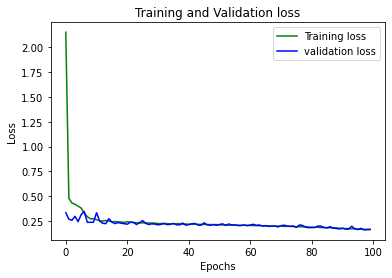

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,100)
plt.plot(history.epoch, loss_train, 'g', label='Training loss')
plt.plot(history.epoch, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
avg=sum(acc_per_fold)/ len(acc_per_fold)


In [ ]:
avg

38.83349031209946

In [ ]:
loss_per_fold

[0.1510048806667328,
 0.14140722155570984,
 0.15003830194473267,
 0.16590291261672974,
 0.1305968165397644,
 0.1573638767004013,
 0.15097413957118988,
 0.14605951309204102,
 0.14859731495380402,
 0.16790898144245148]

In [ ]:
model.save('/content/drive/MyDrive/Data')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data/assets


In [ ]:
!pip install pyyaml h5py

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1000)              757000    
                                                                 
 dense_46 (Dense)            (None, 800)               800800    
                                                                 
 dense_47 (Dense)            (None, 500)               400500    
                                                                 
 dense_48 (Dense)            (None, 100)               50100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_49 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,008,501
Trainable params: 2,008,501
No